### Download the .csv file from Firebase

In [1]:
from firebase_credentials import config
import pyrebase

firebase = pyrebase.initialize_app(config)
storage = firebase.storage()

In [2]:
path_on_cloud1 = "Predictions/2022_Jan_Predictions/sentiment_prediction/1_spositive.csv"
path_on_cloud2 = "Predictions/2022_Jan_Predictions/sentiment_prediction/2_positive.csv"
path_on_cloud3 = "Predictions/2022_Jan_Predictions/sentiment_prediction/3_wpositive.csv"
path_on_cloud4 = "Predictions/2022_Jan_Predictions/sentiment_prediction/4_neutral.csv"
path_on_cloud5 = "Predictions/2022_Jan_Predictions/sentiment_prediction/5_wnegative.csv"
path_on_cloud6 = "Predictions/2022_Jan_Predictions/sentiment_prediction/6_negative.csv"
path_on_cloud7 = "Predictions/2022_Jan_Predictions/sentiment_prediction/7_snegative.csv"

storage.child(path_on_cloud1).download("","predicted_sentiment_values/spositive.csv")
storage.child(path_on_cloud2).download("","predicted_sentiment_values/positive.csv")
storage.child(path_on_cloud3).download("","predicted_sentiment_values/wpositive.csv")
storage.child(path_on_cloud4).download("","predicted_sentiment_values/neutral.csv")
storage.child(path_on_cloud5).download("","predicted_sentiment_values/wnegative.csv")
storage.child(path_on_cloud6).download("","predicted_sentiment_values/negative.csv")
storage.child(path_on_cloud7).download("","predicted_sentiment_values/snegative.csv")

### open the .csv file locally

In [3]:
import pandas as pd

# read .csv files
df1 = pd.read_csv("predicted_sentiment_values/spositive.csv")
df2 = pd.read_csv("predicted_sentiment_values/positive.csv")
df3 = pd.read_csv("predicted_sentiment_values/wpositive.csv")
df4 = pd.read_csv("predicted_sentiment_values/neutral.csv")
df5 = pd.read_csv("predicted_sentiment_values/wnegative.csv")
df6 = pd.read_csv("predicted_sentiment_values/negative.csv")
df7 = pd.read_csv("predicted_sentiment_values/snegative.csv")

In [4]:
# convert dataframe into a list
df1 = df1.values.tolist()
df2 = df2.values.tolist()
df3 = df3.values.tolist()
df4 = df4.values.tolist()
df5 = df5.values.tolist()
df6 = df6.values.tolist()
df7 = df7.values.tolist()

In [5]:
spositive_list = list()
if(len(df1) != 0):
    for i in df1:
        for j in i:
            spositive_list.append(j)
            
positive_list = list()
if(len(df2) != 0):
    for i in df2:
        for j in i:
            positive_list.append(j)
            
wpositive_list = list()
if(len(df3) != 0):
    for i in df3:
        for j in i:
            wpositive_list.append(j)
            
neutral_list = list()
if(len(df4) != 0):
    for i in df4:
        for j in i:
            neutral_list.append(j)
            
wnegative_list = list()
if(len(df5) != 0):
    for i in df5:
        for j in i:
            wnegative_list.append(j)
            
negative_list = list()
if(len(df6) != 0):
    for i in df6:
        for j in i:
            negative_list.append(j)
            
snegative_list = list()
if(len(df7) != 0):
    for i in df7:
        for j in i:
            snegative_list.append(j)

In [6]:
spositive_list

[]

In [7]:
positive_list

['CVS',
 'Costco',
 'Qualcomm',
 'Roche',
 'Novartis',
 'Accenture',
 'Sanofi',
 'Amgen',
 'Target']

In [8]:
wpositive_list

['Boeing',
 'Starbucks',
 'ServiceNow',
 'Chevron',
 'Advanced Mirco Devices',
 'NVIDIA',
 'JD.com',
 'AstraZeneca',
 'Alphabet',
 'Visa',
 'ASML',
 'Adobe',
 'Philip Morris International',
 'American Express']

In [9]:
neutral_list

['Nike',
 'Apple',
 'Salesforce',
 'Alibaba',
 'Disney',
 'Pfizer',
 'Eli Lilly',
 'Broadcom',
 'Cisco',
 'Johnson & Johnson',
 'UPS',
 'Home Depot',
 'Procter & Gamble',
 'Comcast',
 'Tesla',
 'Oracle',
 'Netflix',
 'Citi',
 'Amazon',
 'Siemens',
 'Facebook',
 'Microsoft',
 'Volkswagen',
 'SoftBank',
 'Tencent',
 'Walmart',
 'Toyota',
 'BlackRock',
 'Intel',
 'Goldman Sachs',
 'Airbnb',
 'Sony',
 'JPMorgan Chase',
 'Medtronic',
 'McDonald',
 'AT&T',
 'Mastercard',
 'Merck',
 'Sea',
 'AbbVie',
 'Bristol Myers Squibb',
 'CATL',
 'Blackstone',
 'Bank of America']

In [10]:
wnegative_list

['Caterpillar', 'PayPal']

In [11]:
negative_list

[]

In [12]:
snegative_list

[]

### Machine Learning for Stock Market Prediction
#### using open, High, Low, Volume to predict the Adj Close value
#### use Linear Regression, Disicion Tree and Random Forest to train the predict the data

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import metrics
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import time
import yfinance as yf

import company_list
firebase = pyrebase.initialize_app(config)
storage = firebase.storage()

In [14]:
'''
make a bootstarp sample of the original “Training” Dataset 
with size of bootstarp_size = 0.8*(Size of the original dataset). 
'''
def Bootstrapping(X_train, y_train, X_test, y_test):
    bootstarp_size = int(np.floor( 0.8 * len(X_train) ))
    rmse_list_dt = list()
    rmse_list_rf = list()
    rmse_list_lr = list()
    for i in range(0, 28):

        # Step1 (Bootstrapping)
        X_bag = resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
        y_bag = resample(y_train, n_samples = bootstarp_size , random_state=i , replace = True)

        # Step2 (Training)
        Base_DecisionTree = DecisionTreeRegressor(max_depth=5)
        Base_DecisionTree.fit(X_bag, y_bag)

        Base_rf = RandomForestRegressor(n_estimators=40)
        Base_rf.fit(X_bag, y_bag)

        Base_regression = LinearRegression()
        Base_regression.fit(X_bag, y_bag)

        # Step3 (Base Learner Prediction)
        y_predict_dt = Base_DecisionTree.predict(X_test)
        y_predict_rf = Base_rf.predict(X_test)
        y_predict_lr = Base_regression.predict(X_test)

        # Calculating "Mean Square Error" (MSE):
        mse_dt = metrics.mean_squared_error(y_test, y_predict_dt)
        mse_rf = metrics.mean_squared_error(y_test, y_predict_rf)
        mse_lr = metrics.mean_squared_error(y_test, y_predict_lr)

        # Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
        rmse_dt = np.sqrt(mse_dt)
        rmse_rf = np.sqrt(mse_rf)
        rmse_lr = np.sqrt(mse_lr)

        rmse_list_dt.append(rmse_dt)
        rmse_list_rf.append(rmse_rf)
        rmse_list_lr.append(rmse_lr)
        
        return finalize_model(rmse_list_dt, rmse_list_rf, rmse_list_lr, bootstarp_size, X_train, y_train, X_test, y_test)

In [15]:
def finalize_model(rmse_list_dt, rmse_list_rf, rmse_list_lr, bootstarp_size, X_train, y_train, X_test, y_test):
    # find the lowest rmse and finalize the model
    dt_best_rmse_index = 999
    dt_best_rmse_value = 999
    for i in range(0, len(rmse_list_dt)):
        if(dt_best_rmse_value > rmse_list_dt[i]):
            dt_best_rmse_value = rmse_list_dt[i]
            dt_best_rmse_index = i


    rf_best_rmse_index = 999
    rf_best_rmse_value = 999
    for i in range(0, len(rmse_list_rf)):
        if(rf_best_rmse_value > rmse_list_rf[i]):
            rf_best_rmse_value = rmse_list_rf[i]
            rf_best_rmse_index = i


    lr_best_rmse_index = 999
    lr_best_rmse_value = 999
    for i in range(0, len(rmse_list_lr)):
        if(lr_best_rmse_value > rmse_list_lr[i]):
            lr_best_rmse_value = rmse_list_lr[i]
            lr_best_rmse_index = i

    best_rsme = min(dt_best_rmse_value, rf_best_rmse_value, lr_best_rmse_value)

    if(dt_best_rmse_value == best_rsme):
        # Step1 (Bootstrapping)
        X_bag = resample(X_train, n_samples = bootstarp_size , random_state=dt_best_rmse_index , replace = True)
        y_bag = resample(y_train, n_samples = bootstarp_size , random_state=dt_best_rmse_index , replace = True)

        # Define classifier
        model = DecisionTreeRegressor(random_state=3)
    elif(rf_best_rmse_value == best_rsme):
        # Step1 (Bootstrapping)
        X_bag = resample(X_train, n_samples = bootstarp_size , random_state=rf_best_rmse_index , replace = True)
        y_bag = resample(y_train, n_samples = bootstarp_size , random_state=rf_best_rmse_index , replace = True)

        # Define classifier
        model = RandomForestRegressor(n_estimators=40)
    elif(lr_best_rmse_value == best_rsme):
        # Step1 (Bootstrapping)
        X_bag = resample(X_train, n_samples = bootstarp_size , random_state=lr_best_rmse_index , replace = True)
        y_bag = resample(y_train, n_samples = bootstarp_size , random_state=lr_best_rmse_index , replace = True)

        # Define classifier
        model = LinearRegression()
    else:
        print("Error!")

    # Step2 (Training)
    model.fit(X_bag, y_bag)

    y_predict = model.predict(X_test)

    return y_predict

In [16]:
def plotGraph(df2, name, y_predict, level):
        
        if(level == 1):
            folder_name = "1_strong_positive"
        elif(level == 2):
            folder_name = "2_positive"
        elif(level == 3):
            folder_name = "3_weak_positive"
        elif(level == 4):
            folder_name = "4_neutral"
        elif(level == 5):
            folder_name = "5_weak_negative"
        elif(level == 6):
            folder_name = "6_negative"
        elif(level == 7):
            folder_name = "7_strong_negative"
        
        plt.figure(figsize=(15,5))
        plt.plot(df2['Close'])
        plt.plot(y_predict)
        plt.title(name + "'s' Prediction in Jan 2022")
        plt.xlabel("Days")
        plt.ylabel("Close price USD ($)")
        plt.legend(['Actual Price','Predicted Price'])
        filename = 'stock_prediction/' + folder_name + "/" + name + '.png'
        plt.savefig(filename)
        plt.show()
        
        # upload to firebase
        path_on_cloud = "Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/" + folder_name + "/" + name + ".png"
        path_local = filename
        storage.child(path_on_cloud).put(path_local)
        print("uploaded " + name + '.png' + " to Firebase " + "in: " + path_on_cloud)

In [17]:
def ensemple_learning(sentiment_list, level):
        
    if(len(sentiment_list) != 0):
    
        # create a python list of feature names that would like to pick from the dataset:
        feature_cols = ['Open', 'High', 'Low', 'Volume']

        for i in range(0, len(sentiment_list)):
            
            company_name = sentiment_list[i]
            stock_name = company_list.companies[company_name]
            df1 = yf.download(stock_name, start='2021-12-01', end='2021-12-31')
            df2 = yf.download(stock_name, start='2022-01-03', end='2022-01-28')

            df1.to_csv("training.csv", index = True)
            df2.to_csv("testing.csv", index = True)

            # data for training
            df1=pd.read_csv("training.csv")

            # data for testing
            df2=pd.read_csv("testing.csv")
            
            print("Ensemple learning for " + company_name + "...")

            X1 = df1[feature_cols]
            y_train = df1['Close']

            X2 = df2[feature_cols]
            y_test = df2['Close']

            # using MinMaxScaler to normalize the features
            # data normalization with sklearn

            # fit scaler on training data
            norm1 = MinMaxScaler().fit(X1)
            norm2 = MinMaxScaler().fit(X2)

            # transform training data
            X_norm1 = norm1.transform(X1)
            X_norm2 = norm2.transform(X2)

            X_train = pd.DataFrame(X_norm1, columns = feature_cols)
            X_test = pd.DataFrame(X_norm2, columns = feature_cols)
            
            X_test = X_test.dropna(axis='rows')
            X_train = X_train.dropna(axis='rows')
            y_test = y_test.dropna(axis='rows')
            y_train = y_train.dropna(axis='rows')

            y_predict = Bootstrapping(X_train, y_train, X_test, y_test)

            plotGraph(df2, company_name, y_predict, level)

In [18]:
ensemple_learning(spositive_list, 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for CVS...


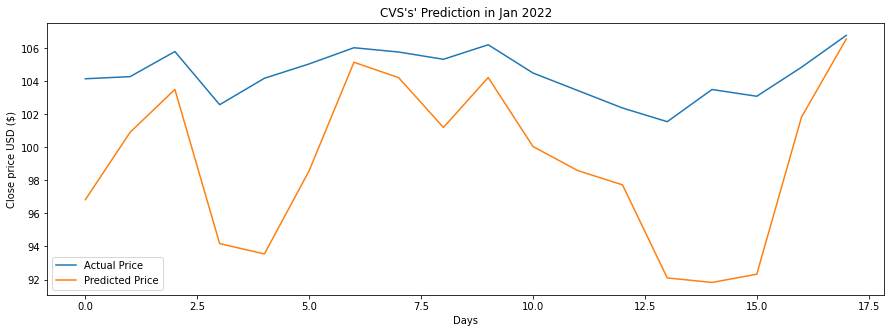

uploaded CVS.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/CVS.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Costco...


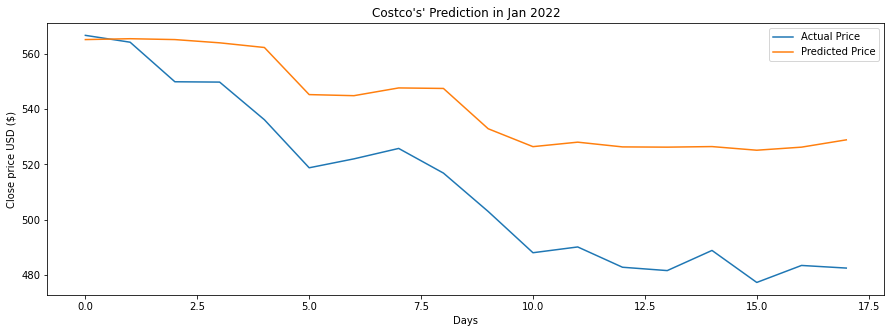

uploaded Costco.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Costco.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Qualcomm...


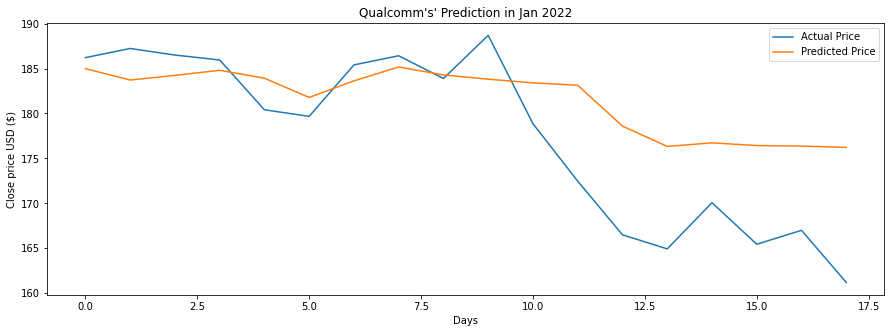

uploaded Qualcomm.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Qualcomm.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Roche...


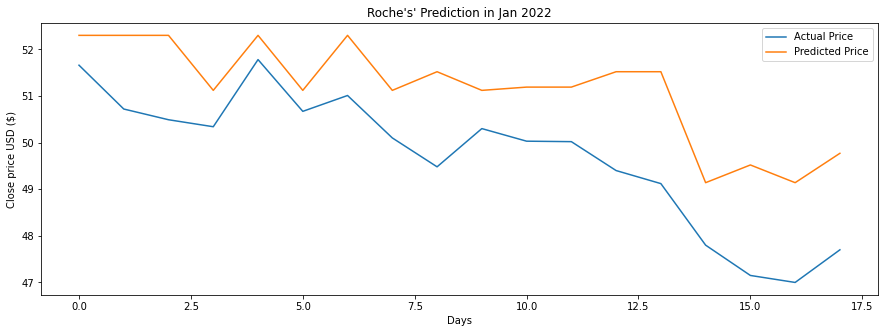

uploaded Roche.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Roche.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Novartis...


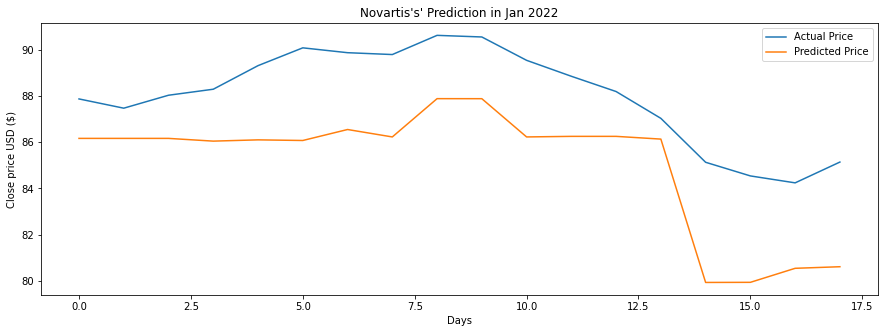

uploaded Novartis.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Novartis.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Accenture...


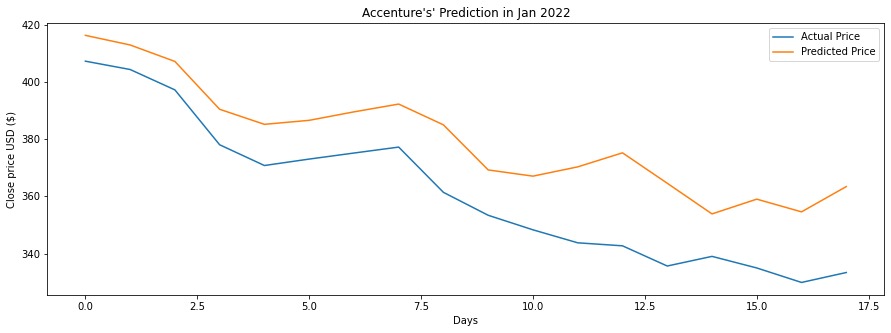

uploaded Accenture.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Accenture.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Sanofi...


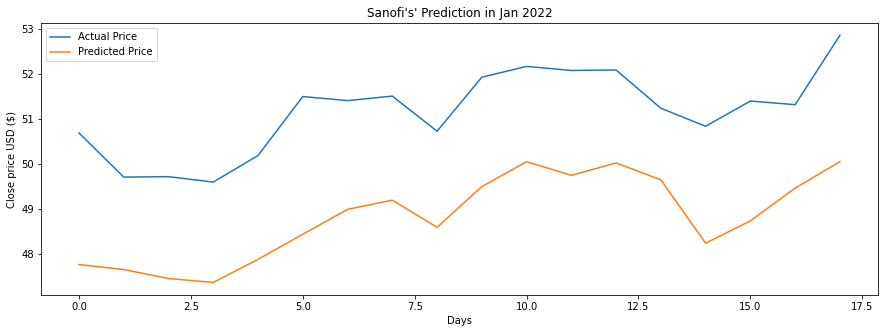

uploaded Sanofi.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Sanofi.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Amgen...


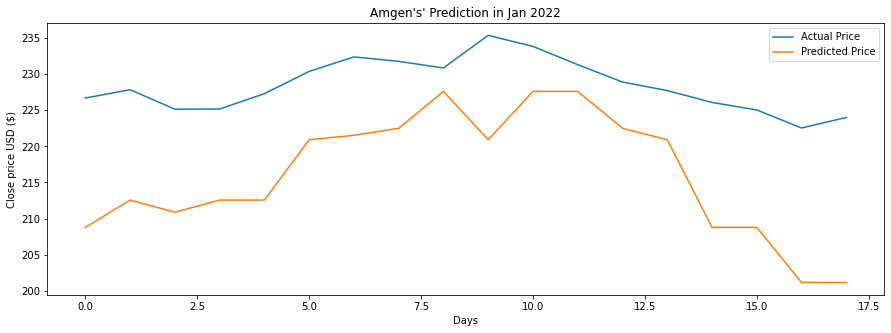

uploaded Amgen.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Amgen.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Target...


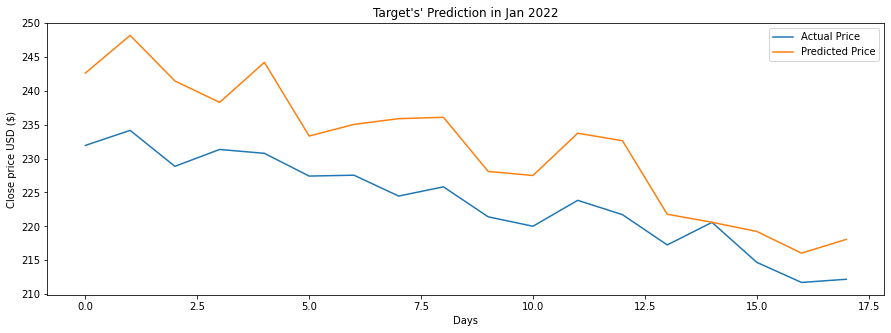

uploaded Target.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/2_positive/Target.png


In [19]:
ensemple_learning(positive_list, 2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Boeing...


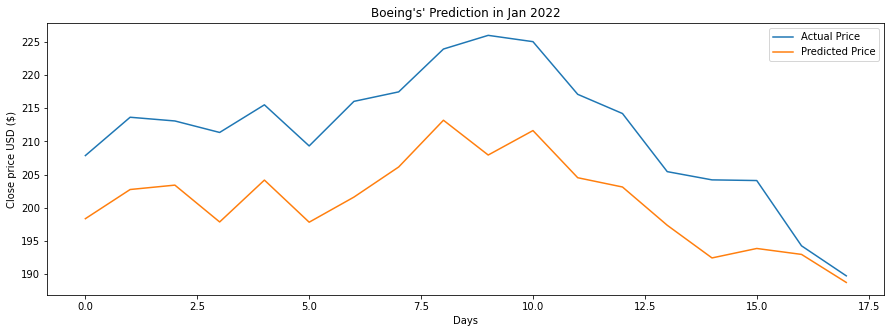

uploaded Boeing.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Boeing.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Starbucks...


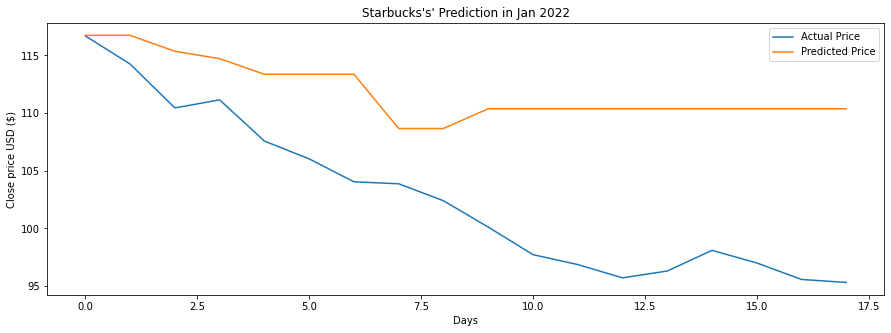

uploaded Starbucks.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Starbucks.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for ServiceNow...


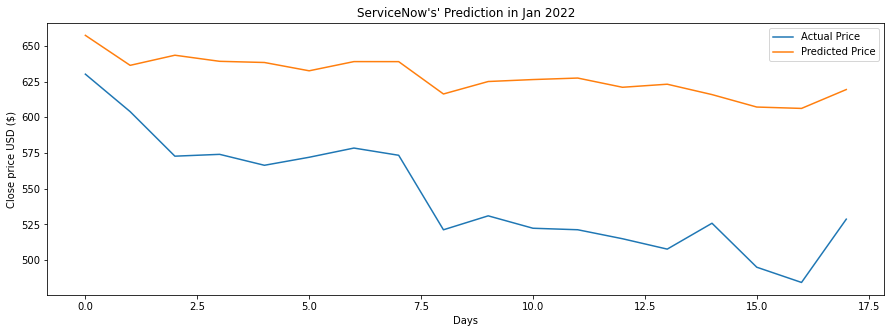

uploaded ServiceNow.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/ServiceNow.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Chevron...


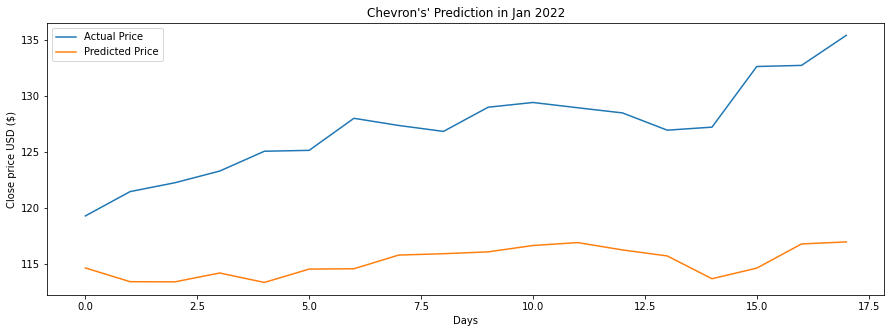

uploaded Chevron.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Chevron.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Advanced Mirco Devices...


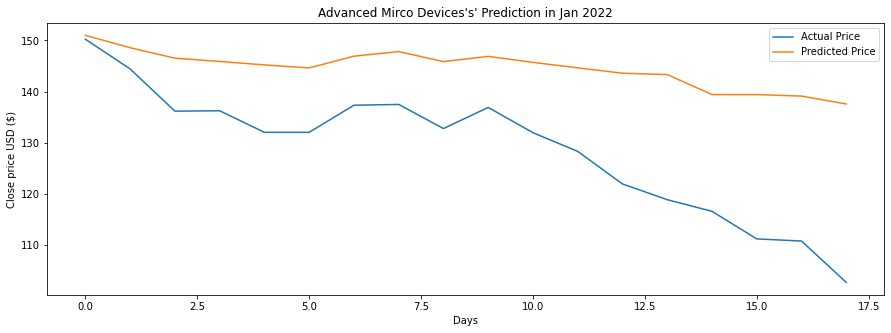

uploaded Advanced Mirco Devices.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Advanced Mirco Devices.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for NVIDIA...


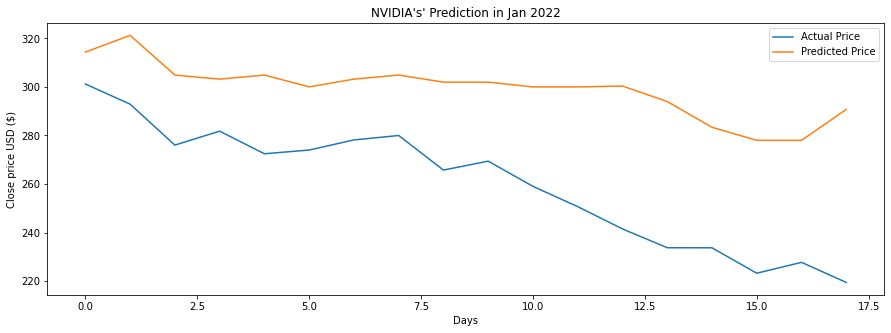

uploaded NVIDIA.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/NVIDIA.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for JD.com...


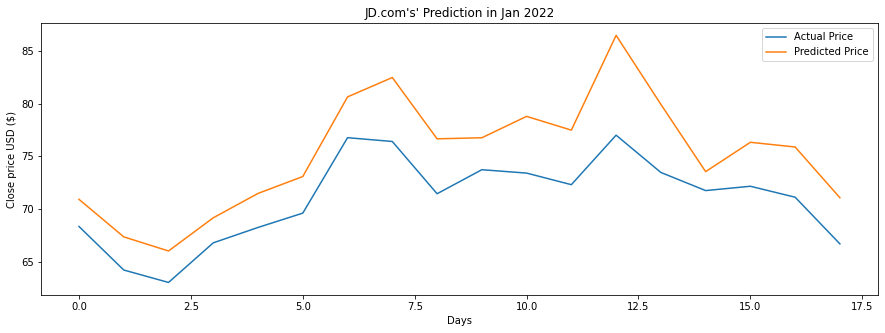

uploaded JD.com.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/JD.com.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for AstraZeneca...


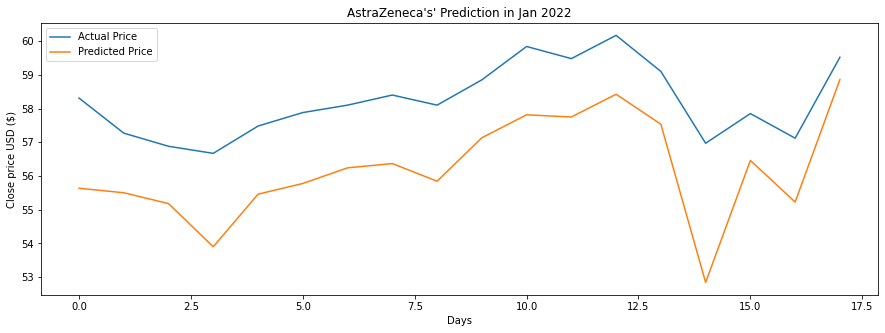

uploaded AstraZeneca.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/AstraZeneca.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Alphabet...


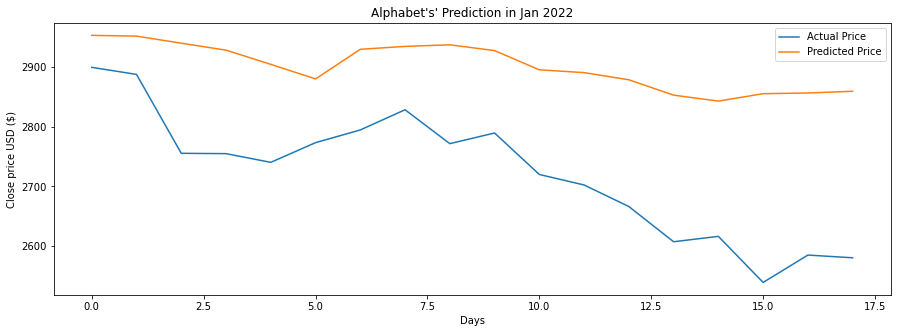

uploaded Alphabet.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Alphabet.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Visa...


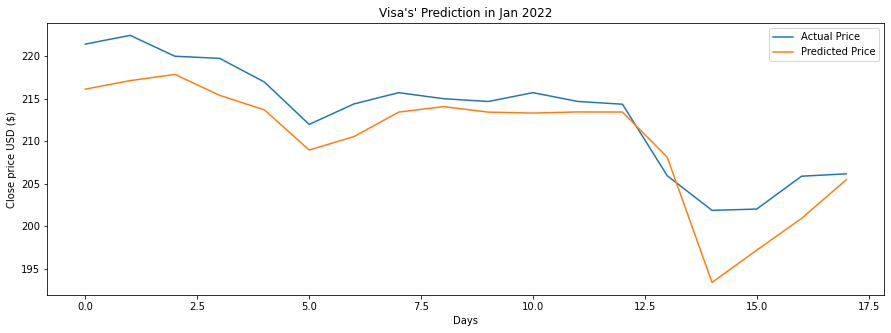

uploaded Visa.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Visa.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for ASML...


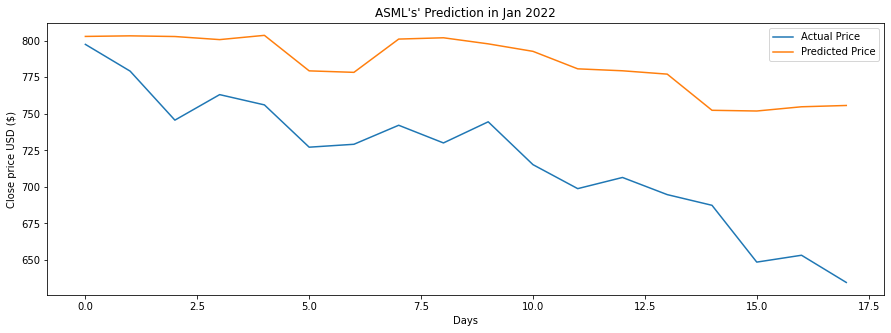

uploaded ASML.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/ASML.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Adobe...


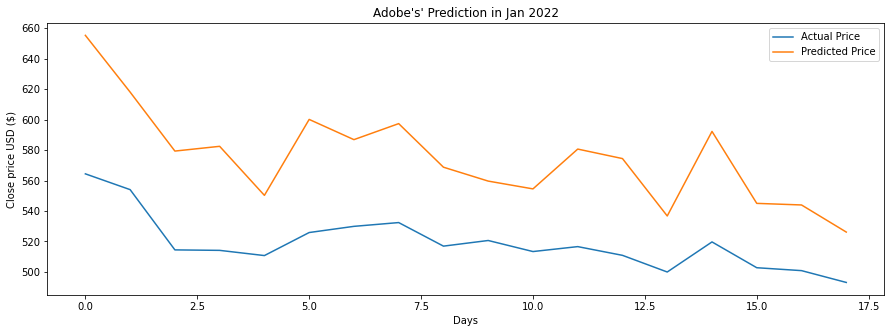

uploaded Adobe.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Adobe.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Philip Morris International...


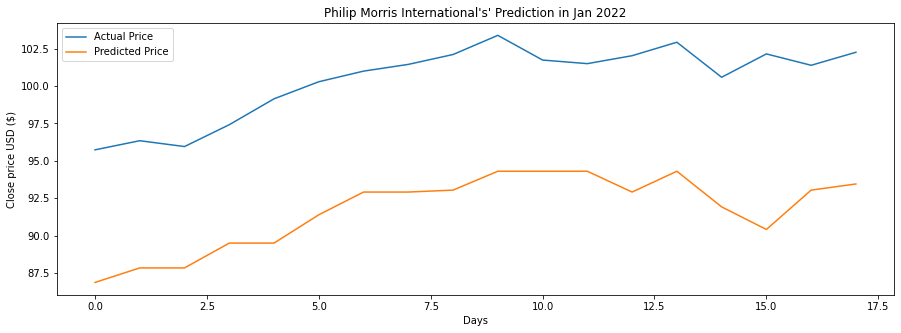

uploaded Philip Morris International.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/Philip Morris International.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for American Express...


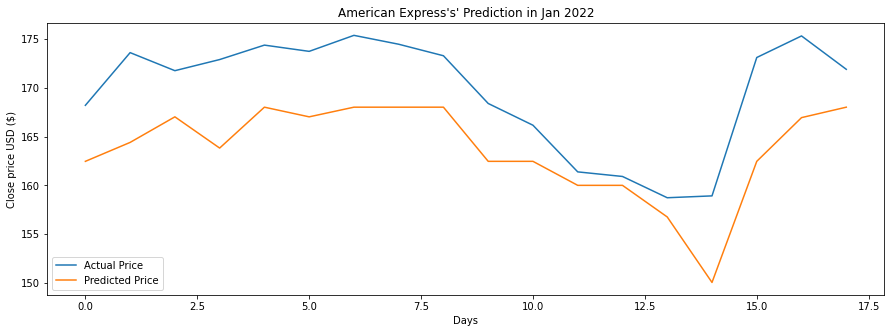

uploaded American Express.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/3_weak_positive/American Express.png


In [20]:
ensemple_learning(wpositive_list, 3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Nike...


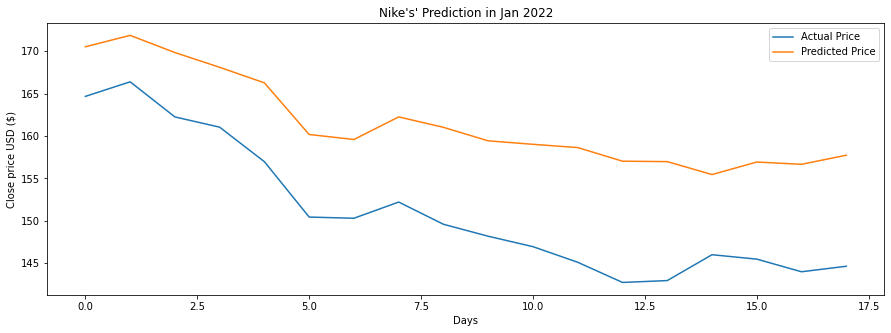

uploaded Nike.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Nike.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Apple...


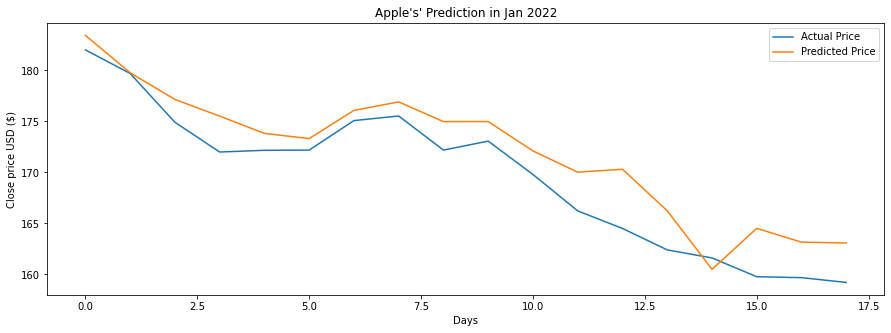

uploaded Apple.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Apple.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Salesforce...


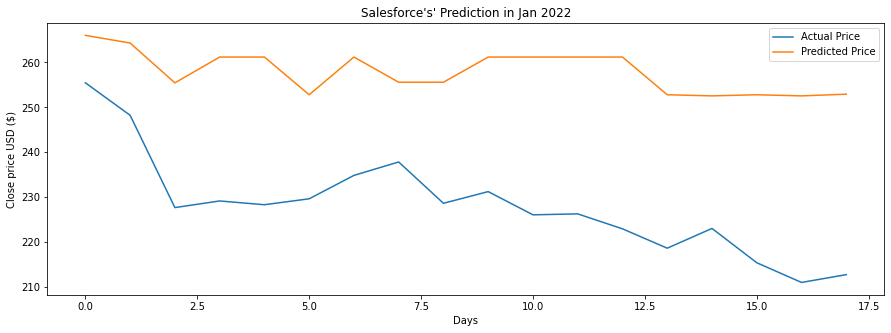

uploaded Salesforce.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Salesforce.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Alibaba...


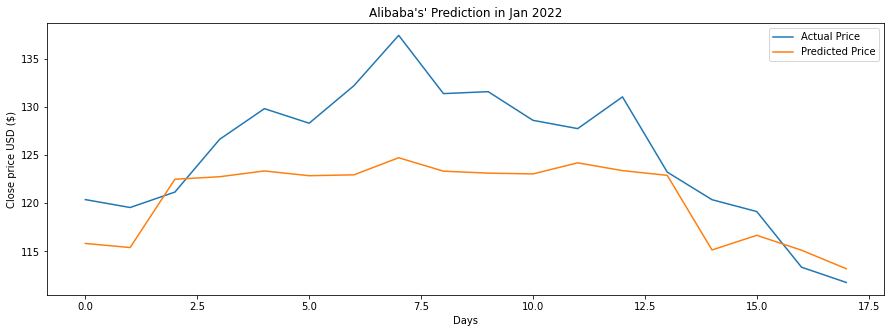

uploaded Alibaba.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Alibaba.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Disney...


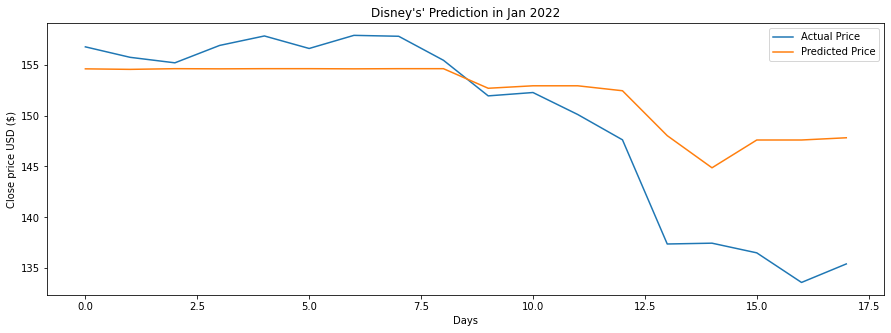

uploaded Disney.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Disney.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Pfizer...


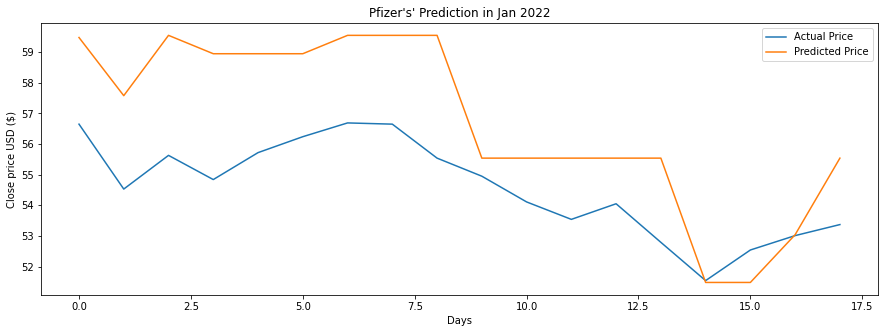

uploaded Pfizer.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Pfizer.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Eli Lilly...


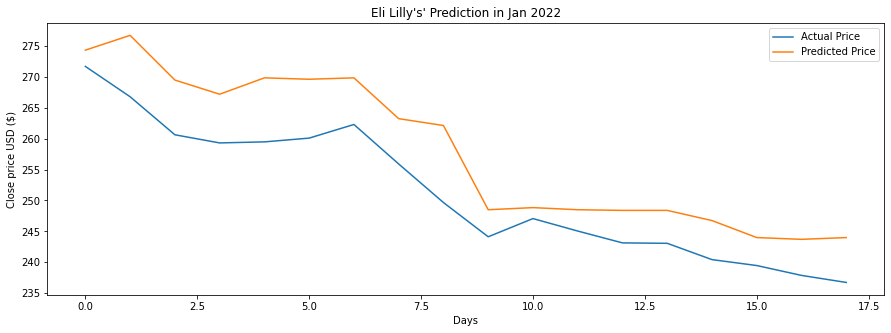

uploaded Eli Lilly.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Eli Lilly.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Broadcom...


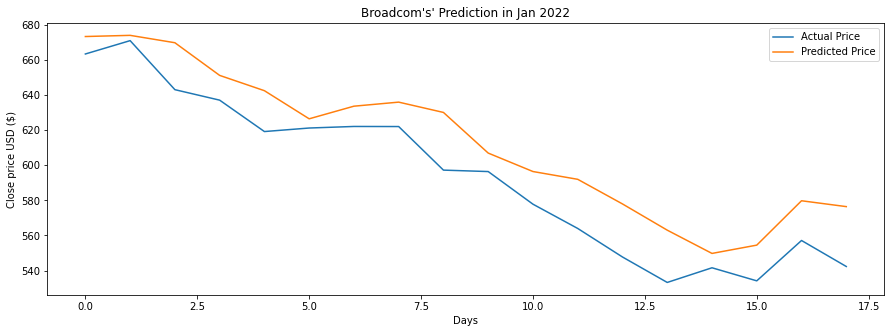

uploaded Broadcom.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Broadcom.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Cisco...


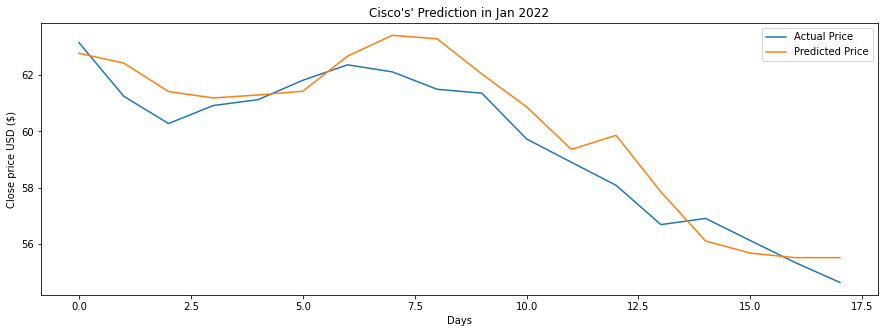

uploaded Cisco.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Cisco.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Johnson & Johnson...


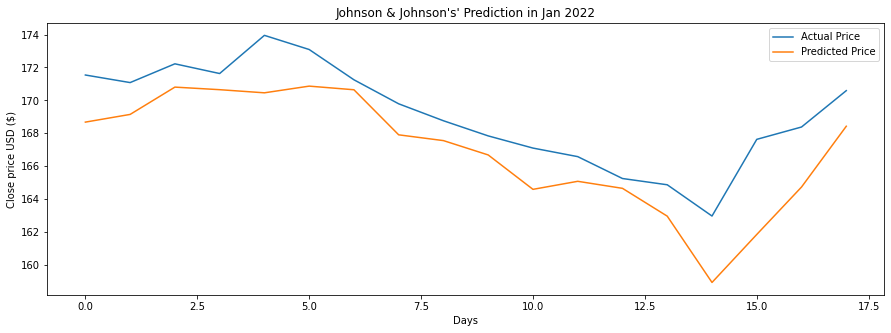

uploaded Johnson & Johnson.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Johnson & Johnson.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for UPS...


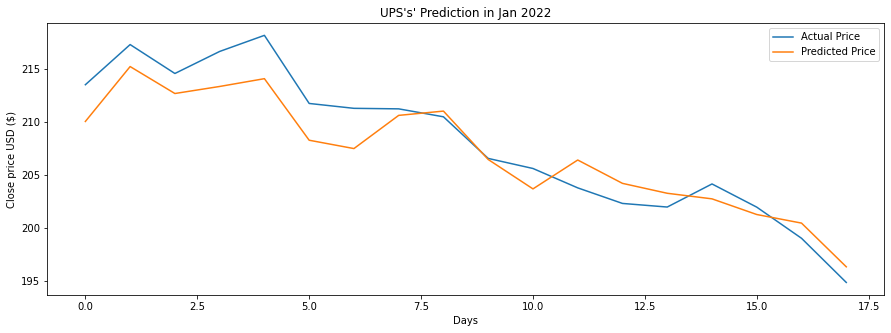

uploaded UPS.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/UPS.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Home Depot...


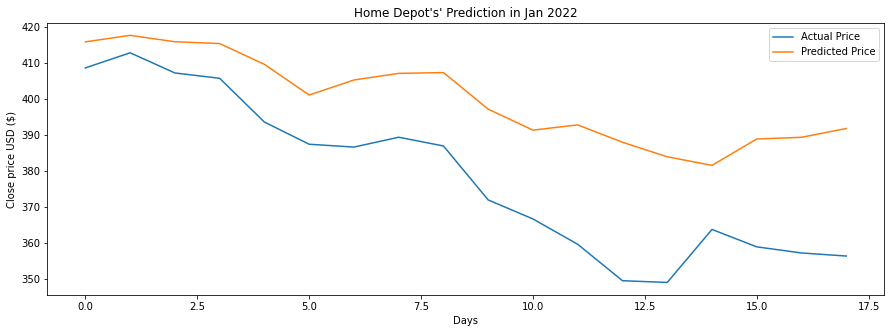

uploaded Home Depot.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Home Depot.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Procter & Gamble...


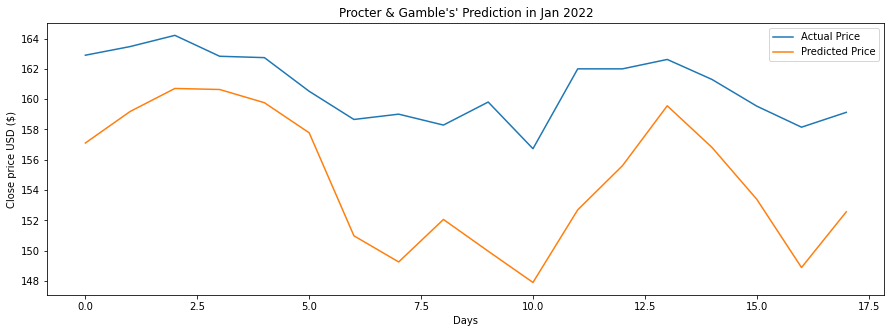

uploaded Procter & Gamble.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Procter & Gamble.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Comcast...


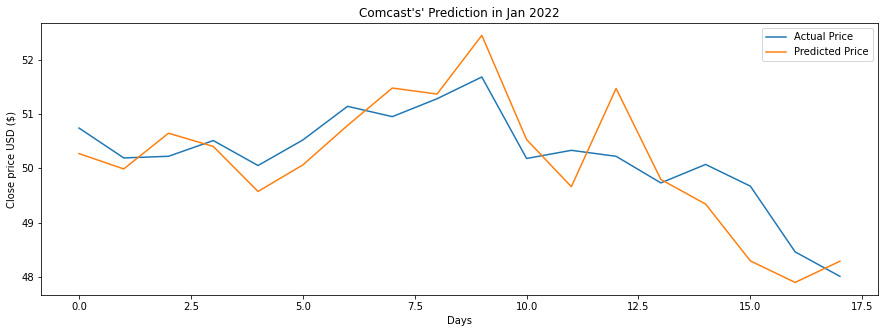

uploaded Comcast.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Comcast.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Tesla...


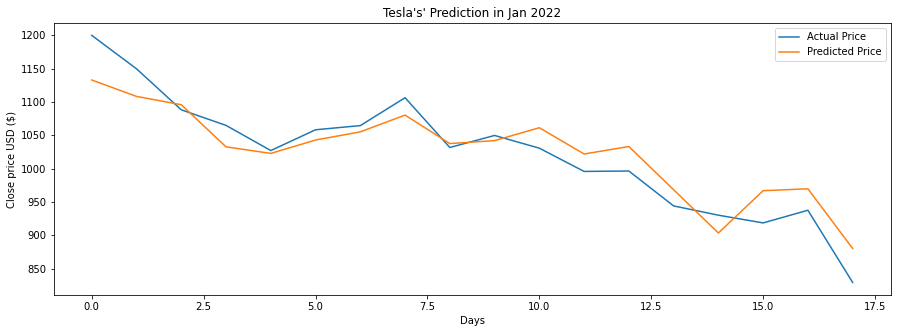

uploaded Tesla.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Tesla.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Oracle...


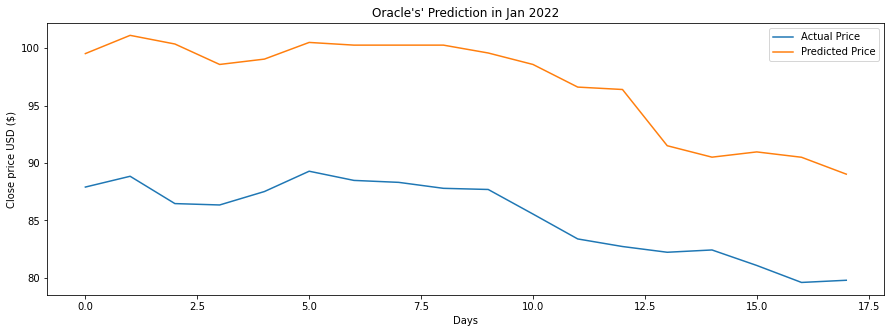

uploaded Oracle.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Oracle.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Netflix...


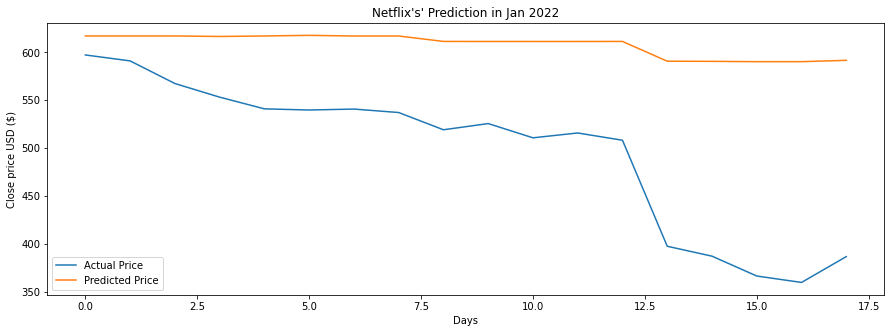

uploaded Netflix.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Netflix.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Citi...


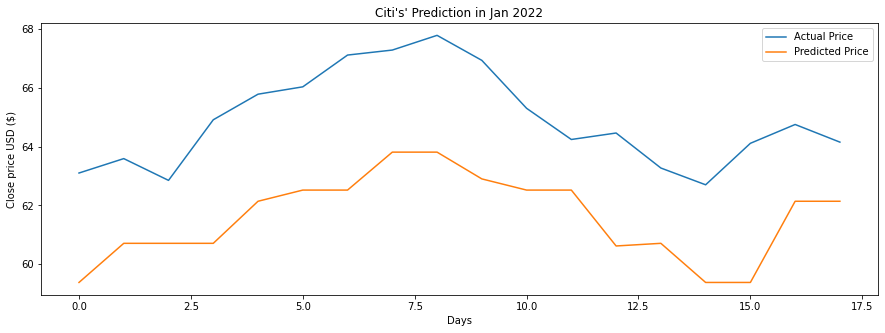

uploaded Citi.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Citi.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Amazon...


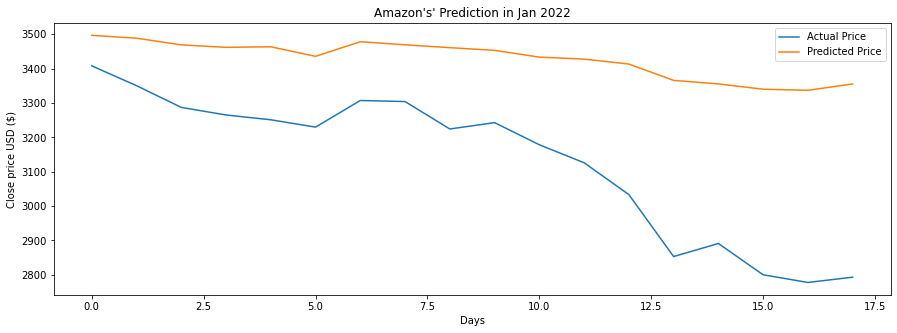

uploaded Amazon.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Amazon.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Siemens...


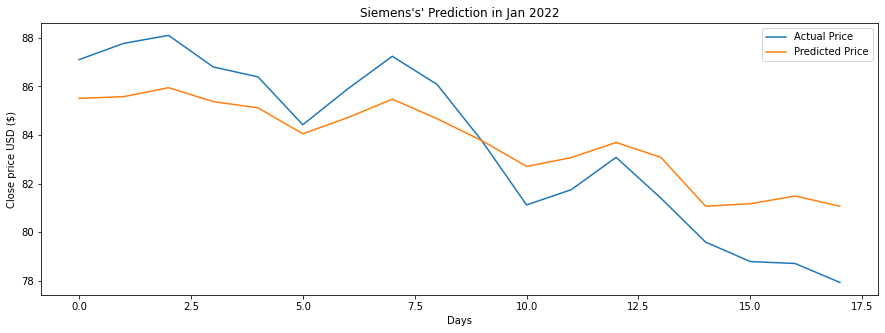

uploaded Siemens.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Siemens.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Facebook...


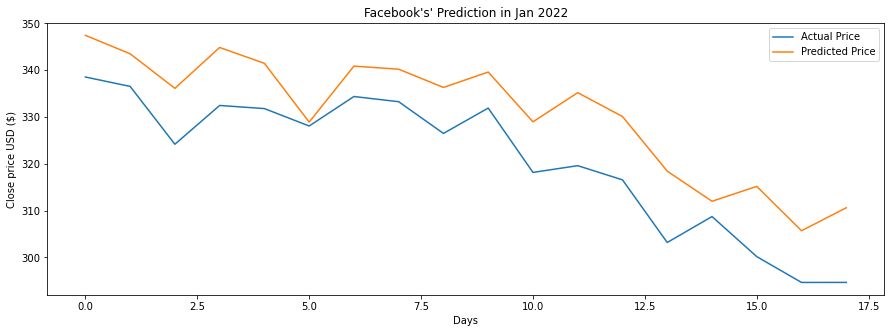

uploaded Facebook.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Facebook.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Microsoft...


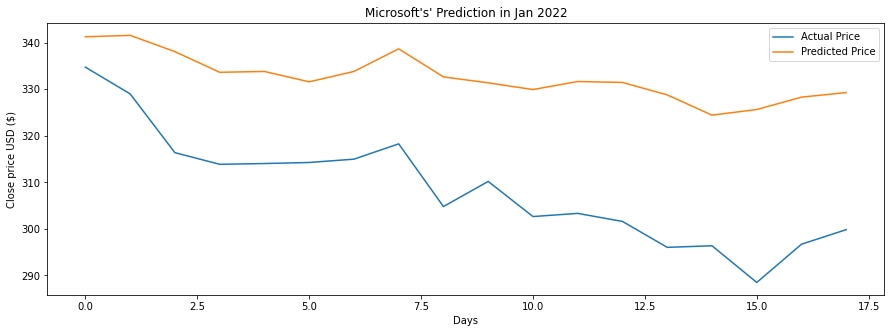

uploaded Microsoft.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Microsoft.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Volkswagen...


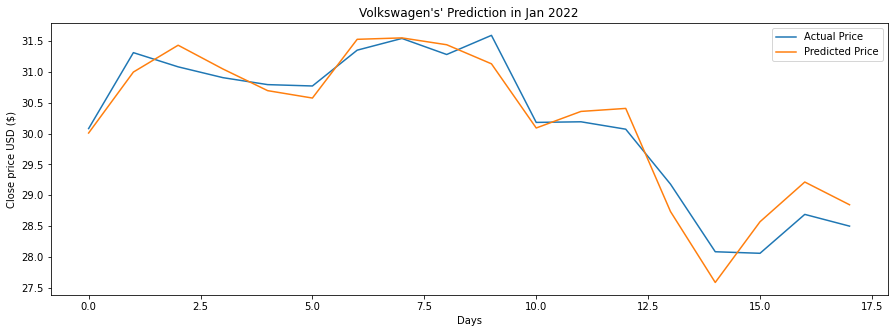

uploaded Volkswagen.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Volkswagen.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for SoftBank...


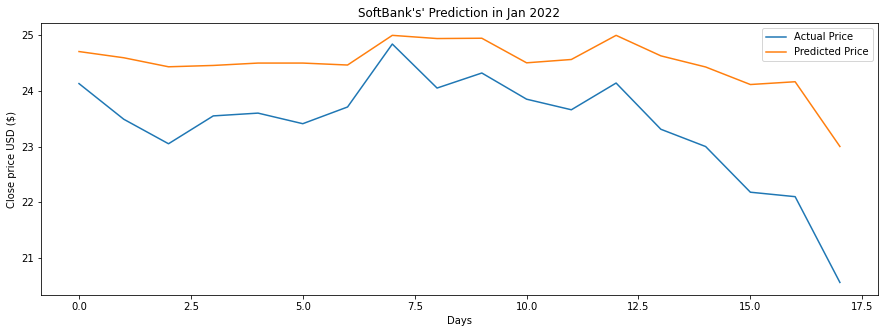

uploaded SoftBank.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/SoftBank.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Tencent...


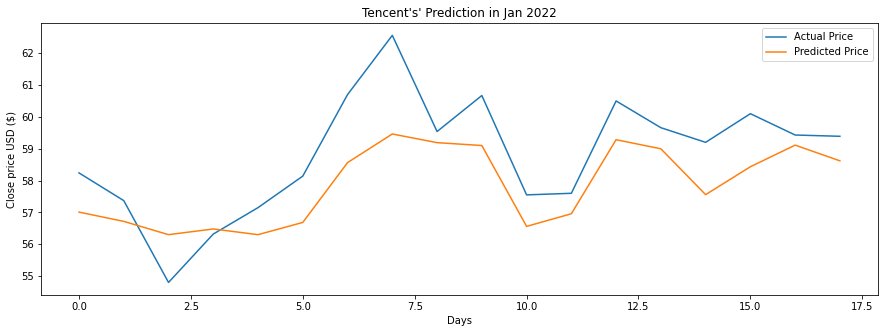

uploaded Tencent.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Tencent.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Walmart...


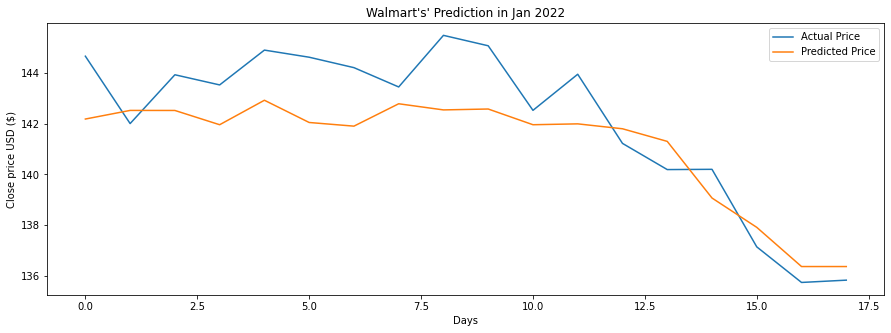

uploaded Walmart.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Walmart.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Toyota...


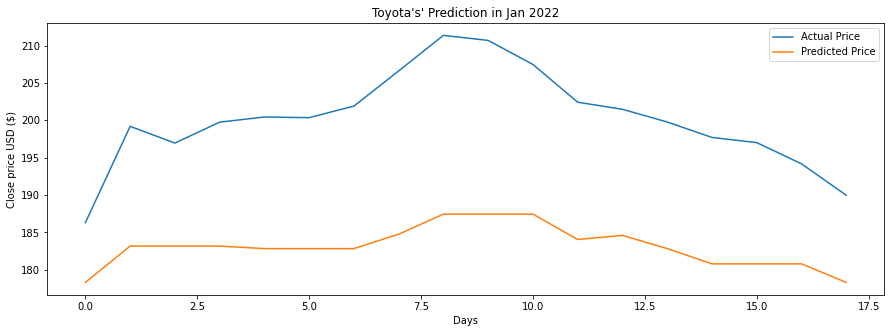

uploaded Toyota.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Toyota.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for BlackRock...


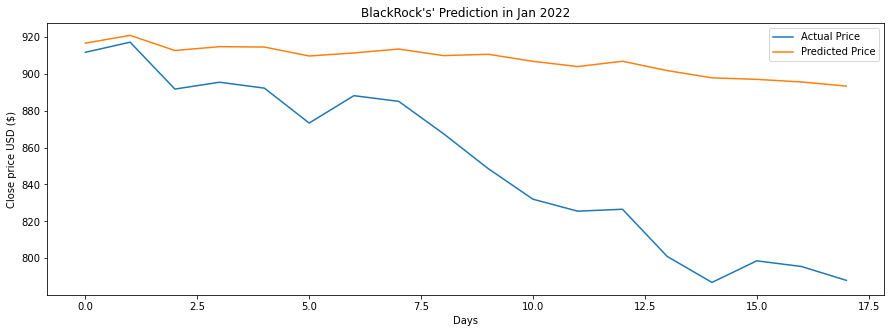

uploaded BlackRock.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/BlackRock.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Intel...


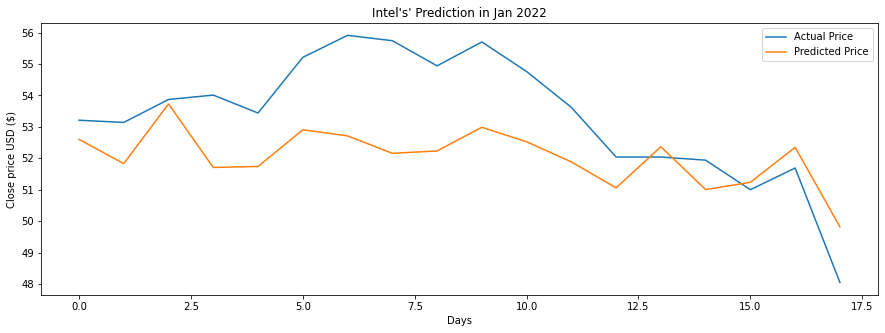

uploaded Intel.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Intel.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Goldman Sachs...


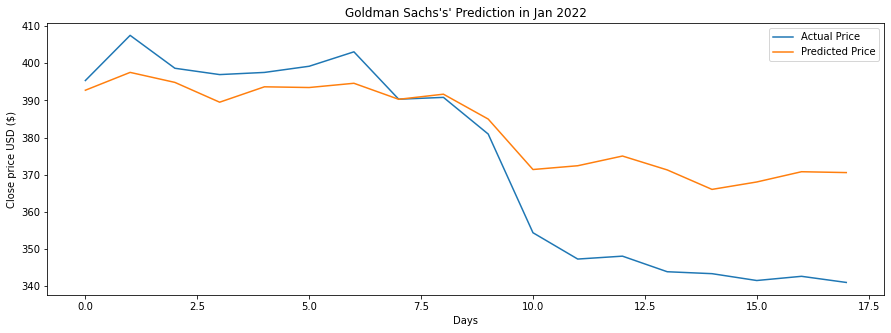

uploaded Goldman Sachs.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Goldman Sachs.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Airbnb...


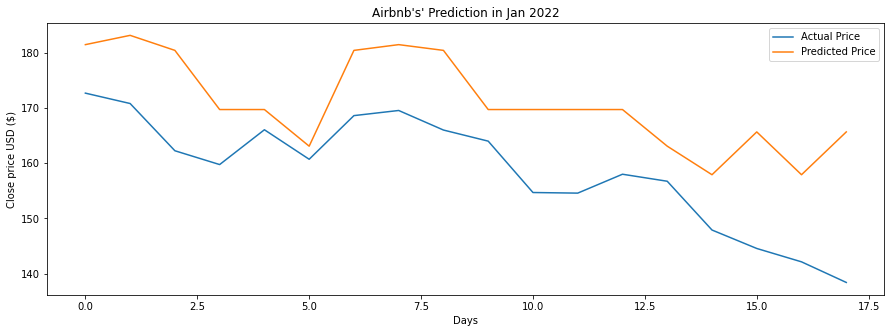

uploaded Airbnb.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Airbnb.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Sony...


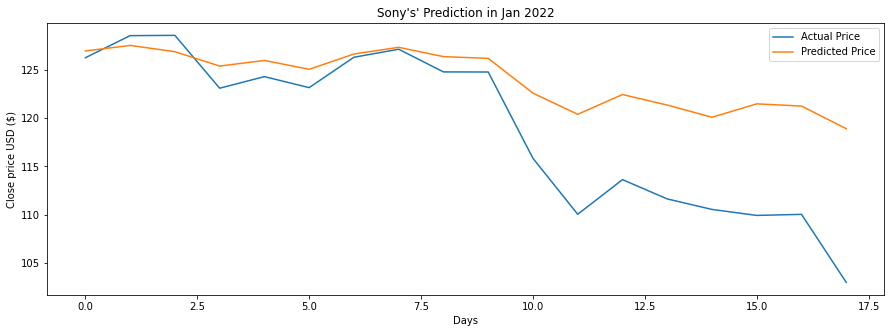

uploaded Sony.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Sony.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for JPMorgan Chase...


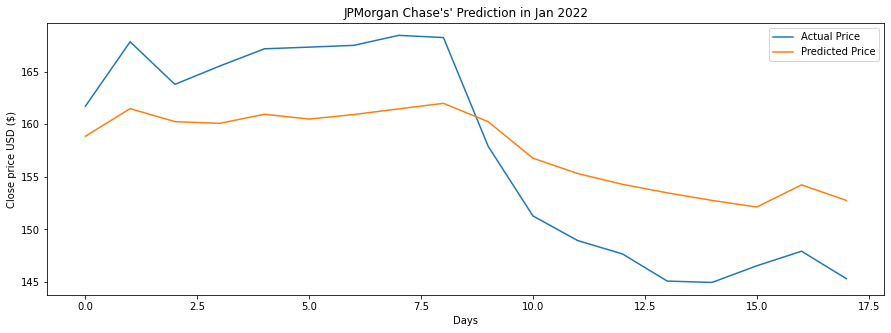

uploaded JPMorgan Chase.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/JPMorgan Chase.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Medtronic...


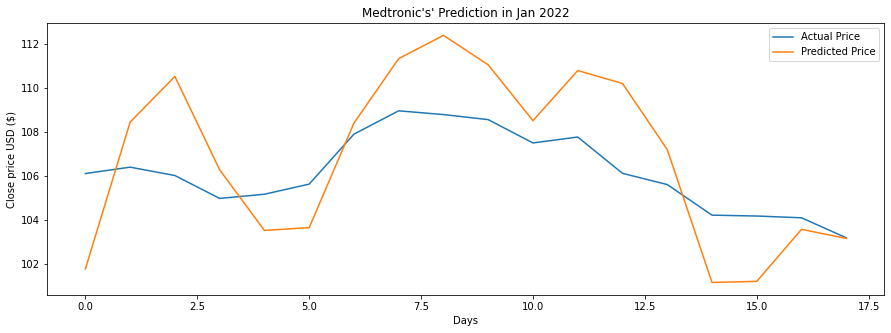

uploaded Medtronic.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Medtronic.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for McDonald...


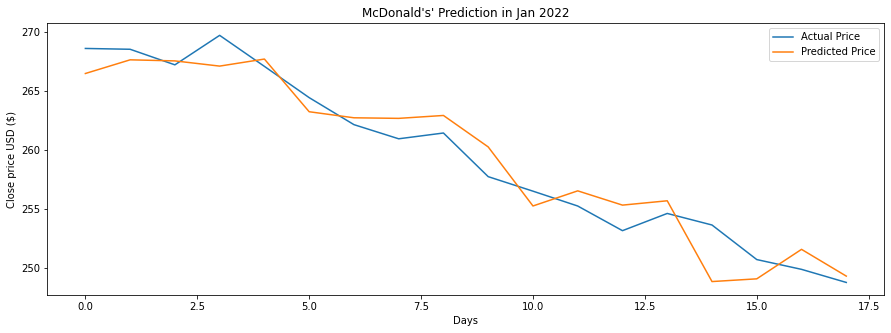

uploaded McDonald.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/McDonald.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for AT&T...


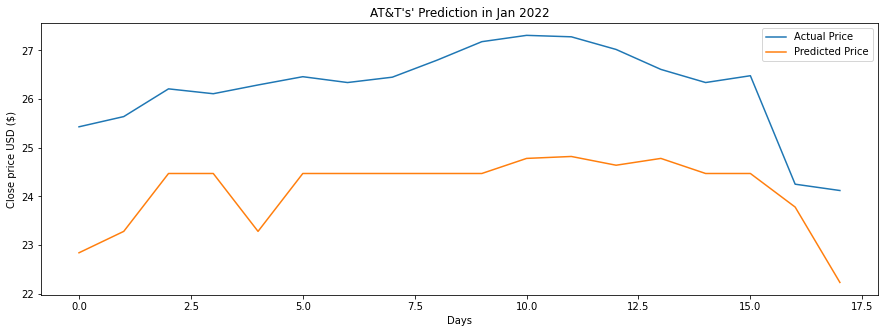

uploaded AT&T.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/AT&T.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Mastercard...


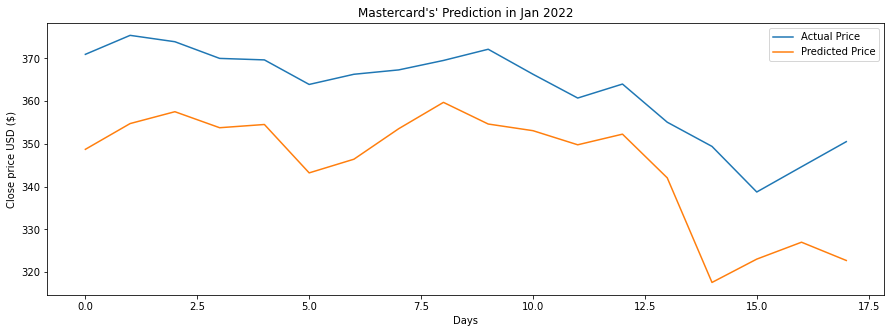

uploaded Mastercard.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Mastercard.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Merck...


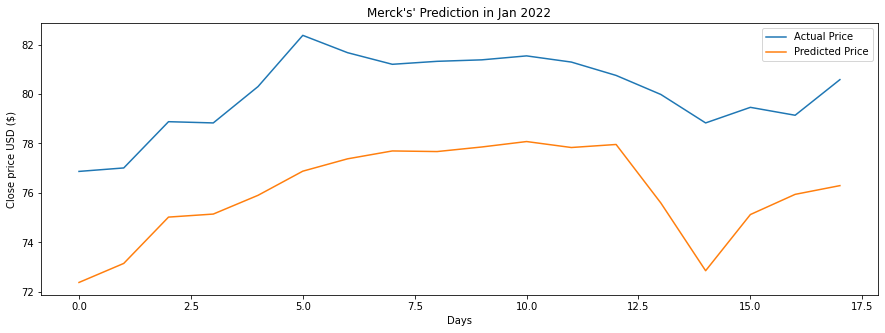

uploaded Merck.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Merck.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Sea...


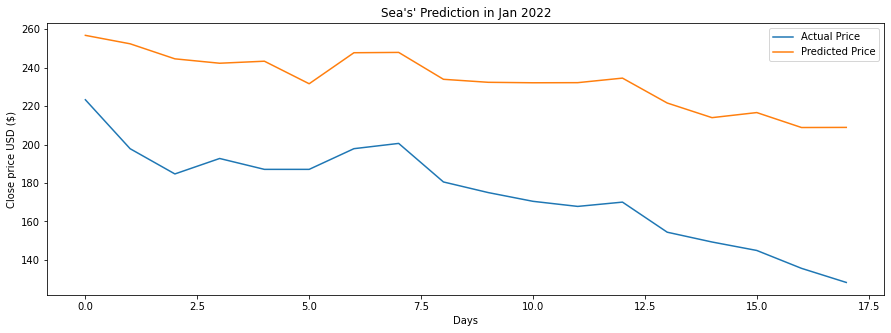

uploaded Sea.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Sea.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for AbbVie...


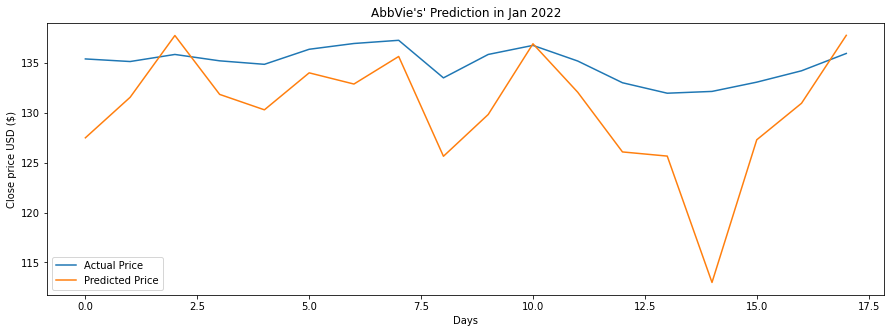

uploaded AbbVie.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/AbbVie.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Bristol Myers Squibb...


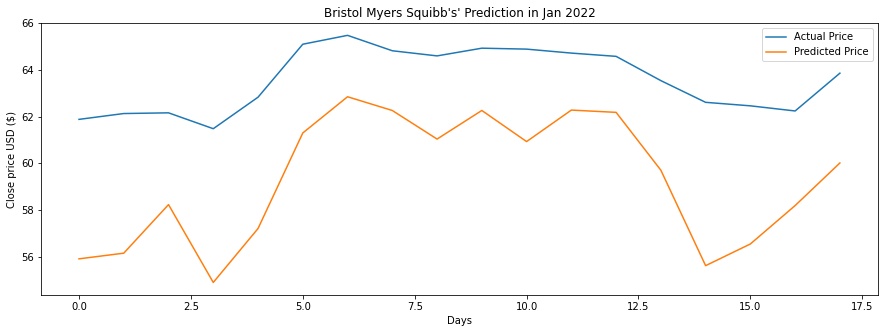

uploaded Bristol Myers Squibb.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Bristol Myers Squibb.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for CATL...


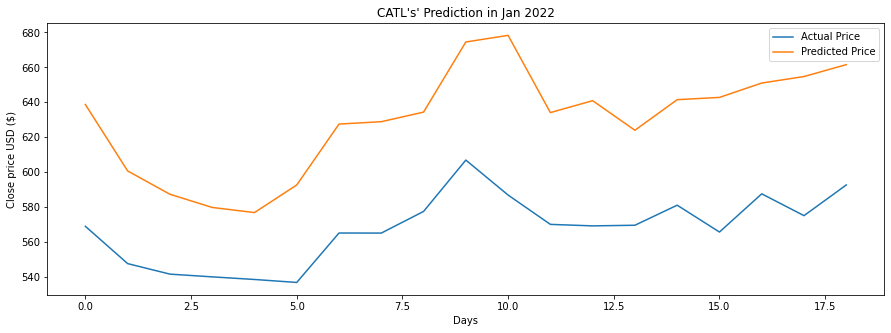

uploaded CATL.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/CATL.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Blackstone...


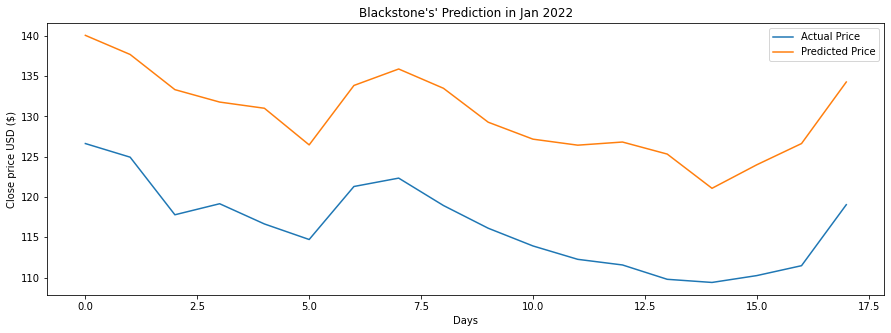

uploaded Blackstone.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Blackstone.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Bank of America...


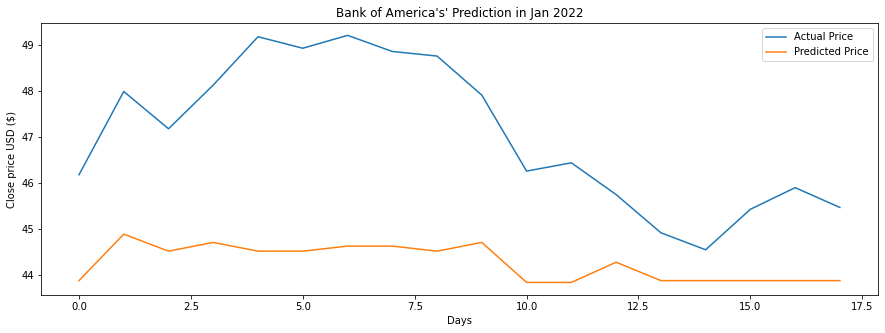

uploaded Bank of America.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/4_neutral/Bank of America.png


In [21]:
ensemple_learning(neutral_list, 4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for Caterpillar...


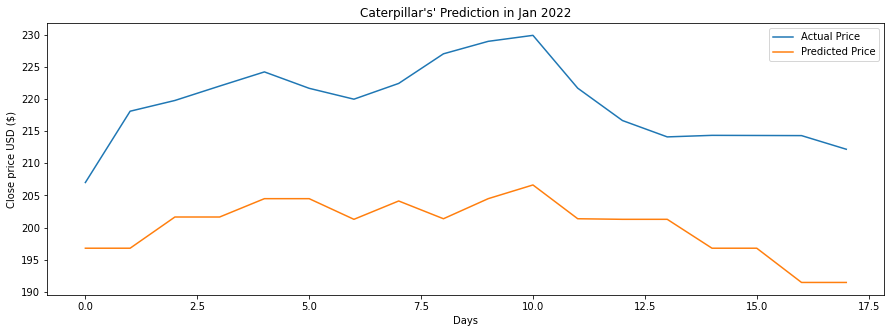

uploaded Caterpillar.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/5_weak_negative/Caterpillar.png
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ensemple learning for PayPal...


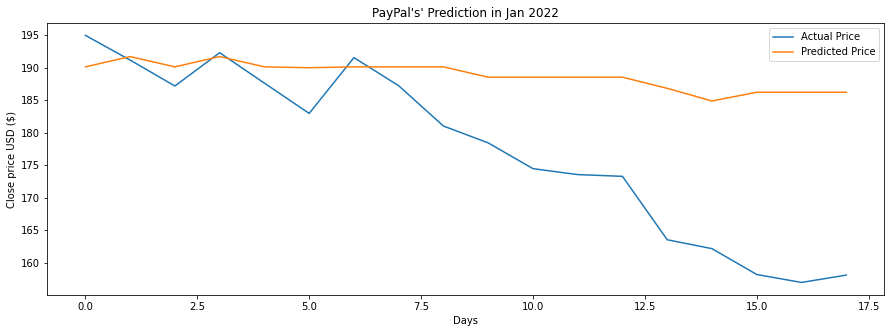

uploaded PayPal.png to Firebase in: Predictions/2022_Jan_Predictions/graphs/2_linear_regression_predictions/5_weak_negative/PayPal.png


In [22]:
ensemple_learning(wnegative_list, 5)

In [23]:
ensemple_learning(negative_list, 6)

In [24]:
ensemple_learning(snegative_list, 7)

In [25]:
# remove testing and training .csv files
import os

file_path1 = 'testing.csv'
file_path2 = 'training.csv'

os.remove(file_path1)
os.remove(file_path2)